***

# **Historical Airplane Accident Analysis**

The dataset used was scraped from the __[PlaneCrashInfo.com](http://www.planecrashinfo.com)__. It contains the details about historical airplane accidents from 1908 to 2021.<br>The contents of this Notebook are:

1. Data Collecting
2. Data Cleaning and Wrangling
3. Data Exploration

***

# **Data Collecting**

In [1]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt

from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
pd.options.mode.chained_assignment = None

In [2]:
def getHTMLContent(link):
    req = Request(link, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req)
    soup = BeautifulSoup(html, 'html.parser')
    return soup

**Creating the dataframe and its columns name first**

In [3]:
header = []
tables = getHTMLContent('http://www.planecrashinfo.com/1920/1920-1.htm').find_all('table')[0].find_all('tr')
for row in range(1, len(tables)):
    header.append(tables[row].find_all('td')[0].text[:-1].lower())
df = pd.DataFrame([], columns=header)
df.rename(columns={"ac\n        type": "ac_type", "flight #":"flight_num", "cn / ln": "line_num"}, inplace=True)

**Extracting the data**

In [4]:
for year in range(1920, 2021+1):
    print(year, end ='')
    i=1
    while i != -1:
        try:
            l = []
            tables = getHTMLContent('http://www.planecrashinfo.com/'+str(year)+'/'+str(year)+'-'+str(i)+'.htm').find_all('table')[0].find_all('tr')
            for row in range(1, len(tables)):
                l.append(tables[row].find_all('td')[1].text)
            df.loc[len(df), :] = l
            i += 1
        except:
            print('(' + str(i) + ')' + ';', end='')
            i = -1

1920(52);1921(13);1922(14);1923(14);1924(8);1925(12);1926(14);1927(22);1928(37);1929(40);1930(27);1931(34);1932(29);1933(29);1934(32);1935(43);1936(51);1937(37);1938(58);1939(31);1940(26);1941(28);1942(39);1943(45);1944(57);1945(76);1946(90);1947(83);1948(79);1949(68);1950(72);1951(76);1952(66);1953(71);1954(63);1955(58);1956(54);1957(67);1958(69);1959(67);1960(71);1961(61);1962(79);1963(65);1964(60);1965(65);1966(61);1967(59);1968(66);1969(70);1970(74);1971(59);1972(78);1973(65);1974(59);1975(52);1976(58);1977(64);1978(52);1979(61);1980(46);1981(51);1982(55);1983(49);1984(49);1985(57);1986(52);1987(55);1988(84);1989(84);1990(62);1991(70);1992(67);1993(57);1994(75);1995(61);1996(69);1997(57);1998(60);1999(63);2000(64);2001(59);2002(56);2003(63);2004(47);2005(46);2006(39);2007(44);2008(64);2009(47);2010(41);2011(37);2012(27);2013(26);2014(24);2015(19);2016(24);2017(16);2018(20);2019(14);2020(9);2021(8);

**Saving the data for backup**

In [5]:
df.to_csv('extracted_data.csv', index = False, header=True)

**I start here if the kernel restarted (Web scraping 5000+ pages takes a long time)**

In [6]:
df = pd.read_csv('extracted_data.csv')

**View the data**

In [7]:
df.head()

,date,time,location,operator,flight_num,route,ac_type,registration,line_num,aboard,fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...


In [8]:
df.shape[0]

5045

***

# **Data Cleaning and Wrangling**

**Dropping unnecessary columns and replacing ? with NaN**

In [9]:
df.drop(columns=['flight_num', 'registration', 'line_num', 'ground'], inplace=True)
df.replace({'?':np.nan}, inplace=True)

In [10]:
df.head()

,date,time,location,operator,route,ac_type,aboard,fatalities,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2 (passengers:1 crew:1),1 (passengers:1 crew:0),"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1 (passengers:0 crew:1),1 (passengers:0 crew:0),Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5 (passengers:0 crew:5),5 (passengers:0 crew:5),First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1 (passengers:0 crew:1),1 (passengers:0 crew:1),The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20 (passengers:? crew:?),14 (passengers:? crew:?),The airship flew into a thunderstorm and encou...


**Reformat time and date**

I decided to separate date and time because several data have null value in their time column

In [11]:
temp = df.loc[~df['time'].isna(), 'time'].str.replace(' ', '').str.replace('Z', '').str.replace('c', '0')
df.loc[~df['time'].isna(), 'time'] = temp.astype(str).str[0:2] + ':' + temp.astype(str).str[-2:]
df['time'] = pd.to_datetime(df['time'],format= '%H:%M',errors='coerce').dt.time
df['date'] = pd.to_datetime(df['date'],format= '%B %d, %Y')

In [12]:
df.head()

,date,time,location,operator,route,ac_type,aboard,fatalities,summary
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2 (passengers:1 crew:1),1 (passengers:1 crew:0),"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaT,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1 (passengers:0 crew:1),1 (passengers:0 crew:0),Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5 (passengers:0 crew:5),5 (passengers:0 crew:5),First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaT,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1 (passengers:0 crew:1),1 (passengers:0 crew:1),The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20 (passengers:? crew:?),14 (passengers:? crew:?),The airship flew into a thunderstorm and encou...


**Removing the information about the number of passenger and crew (only show the total number)**

In [13]:
df['aboard'] = pd.to_numeric(df['aboard'].str.split(" ", expand=True)[0], errors='coerce').astype('Int16')
df['fatalities'] = pd.to_numeric(df['fatalities'].str.split(" ", expand=True)[0], errors='coerce').astype('Int16')

In [14]:
df.head()

,date,time,location,operator,route,ac_type,aboard,fatalities,summary
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2,1,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaT,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1,1,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5,5,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaT,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1,1,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20,14,The airship flew into a thunderstorm and encou...


**Split the specific location and country Location**

In [15]:
temp = df['location'].str.rsplit(', ', n=1, expand=True)
df['country_loc'] = temp[1]
df['specific_loc'] = temp[0]
df.drop(columns='location', inplace=True)

In [16]:
df.head()

,date,time,operator,route,ac_type,aboard,fatalities,summary,country_loc,specific_loc
0,1908-09-17,17:18:00,Military - U.S. Army,Demonstration,Wright Flyer III,2,1,"During a demonstration flight, a U.S. Army fly...",Virginia,Fort Myer
1,1909-09-07,NaT,NaN,Air show,Wright Byplane,1,1,Eugene Lefebvre was the first pilot to ever be...,France,Juvisy-sur-Orge
2,1912-07-12,06:30:00,Military - U.S. Navy,Test flight,Dirigible,5,5,First U.S. dirigible Akron exploded just offsh...,New Jersey,Atlantic City
3,1913-08-06,NaT,Private,NaN,Curtiss seaplane,1,1,The first fatal airplane accident in Canada oc...,Canada,"Victoria, British Columbia"
4,1913-09-09,18:30:00,Military - German Navy,NaN,Zeppelin L-1 (airship),20,14,The airship flew into a thunderstorm and encou...,None,Over the North Sea


**Fixing the country locations data that contain the name of US states, not the US itself (Ex: Virginia is in the country_loc column)**

Erasing whitespaces first

In [17]:
df.loc[df['country_loc'].str[0] == ' ', 'country_loc'] = df.loc[df['country_loc'].str[0] == ' ', 'country_loc'].str[1:]

Web-scraping US states names from Wikipedia

In [18]:
states = []
tab = getHTMLContent('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States').find_all('table')[1].find_all('tr')

for row in range(2, len(tab)):
    states.append(tab[row].find_all('th')[0].text[1:-1])
states.append('Washington D.C.')

states = pd.Series(states)
states = states.str.replace('\[D\]', '').to_list()
states[:5]

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California']

In [19]:
temp = df.loc[df['country_loc'].isin(states)].index
df['specific_loc'].iloc[temp] += ', ' + df['country_loc'].iloc[temp]
df['country_loc'].iloc[temp] = 'United States'

In [20]:
df.iloc[temp].head()

,date,time,operator,route,ac_type,aboard,fatalities,summary,country_loc,specific_loc
0,1908-09-17,17:18:00,Military - U.S. Army,Demonstration,Wright Flyer III,2,1,"During a demonstration flight, a U.S. Army fly...",United States,"Fort Myer, Virginia"
2,1912-07-12,06:30:00,Military - U.S. Navy,Test flight,Dirigible,5,5,First U.S. dirigible Akron exploded just offsh...,United States,"Atlantic City, New Jersey"
23,1918-12-16,NaT,US Aerial Mail Service,NaN,De Havilland DH-4,1,1,Carl Smith was killed when his mail plane feet...,United States,"Elizabeth, New Jersey"
24,1919-05-25,NaT,US Aerial Mail Service,NaN,De Havilland DH-4,1,1,Caught fire in midair. The pilot leaped from t...,United States,"Cleveland, Ohio"
25,1919-07-19,NaT,US Aerial Mail Service,NaN,De Havilland DH-4,1,1,The mail plane crashed under unknown circumsta...,United States,"Dix Run, Pennsylvania"


**Doing it for the UK countries too**

In [21]:
uk_states = ['England', 'Scotland', 'Wales', 'Nothern Ireland']
df.loc[df['country_loc'].isin(uk_states), 'country_loc'] = 'United Kingdom'

**Cleaning other uncleaned names (typo, unofficial names, former countries, etc.)**

Web-scraping official country names from Worldometers, with some additions of unofficial names that appear frequently in the dataset

In [22]:
countries = []
tab = getHTMLContent('https://www.worldometers.info/geography/alphabetical-list-of-countries/').find_all('table')[0].find_all('tr')

for row in range(1, len(tab)):
    countries.append(tab[row].find_all('td')[1].text)

countries.extend(['Taiwan', 'Hong Kong', 'United States', 'Congo', 'Democratic Republic Congo', 'Czech Republic', 'Eswatini', 'Myanmar', 'Bosnia-Herzegovina', 'Puerto Rico', 'Greenland', 'Macedonia'])

countries[:5]

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']

Checking the number of names that are not in the above list

In [23]:
df.loc[(~df['country_loc'].isin(countries)) & (df['country_loc'].notna()), 'country_loc'].value_counts().head(10)

USSR              68
South Vietnam     40
New Guinea        19
Czechoslovakia    14
Yugoslavia        13
Burma             13
Newfoundland      11
Zaire             11
West Germany       8
Virgin Islands     6
Name: country_loc, dtype: int64

Replacing the names if they're a part of a bigger country in present times

In [24]:
df['country_loc'].replace({'South Vietnam':'Vietnam', 'Burma':'Myanmar','Newfoundland':'Canada','West Germany':'Germany', 'New Guinea':'Papua New Guinea', 'Zaire':'Democratic Republic Congo'}, inplace=True)

Replacing the USSR with its Post-Soviet country location name

In [25]:
index = df.loc[(df['country_loc'] == 'USSR') & (df['specific_loc'].str.contains(',')), 'specific_loc'].index
temp = df.loc[index, 'specific_loc'].str.rsplit(', ', n=1, expand=True)
df.loc[index, 'specific_loc'] = temp[0]
df.loc[index, 'country_loc'] = temp[1]

Assuming it's Russia if its Post-Soviet name doesn't exist

In [26]:
df.loc[df['country_loc'] == 'USSR', 'country_loc'] = 'Russia'

In [27]:
df.loc[index].head()

,date,time,operator,route,ac_type,aboard,fatalities,summary,country_loc,specific_loc
96,1925-03-22,NaT,Zakavia,Tiflis - Suchumi,Junkers F-13,5,5,Shortly after take off the plane went out of c...,Georgia,Near Tiflis
326,1933-11-21,15:00:00,Kalinin,Test flight,Kalinin K-7,20,14,Crashed due to structural failure during a tes...,Ukraine,Near Kharkov
1071,1948-10-12,13:00:00,Aeroflot,Tashkent - Baku - Tbilisi - Sochi,Ilyushin Il12,10,10,Crashed after turning back towards its point o...,Azerbaijan,Near Yevlakh
1799,1959-11-16,19:06:00,Aeroflot,Moscow - Kiev - Lvov,Antonov AN-10,40,40,Loss of control in icing conditions when the f...,Ukraine,Lvov
1805,1959-12-13,09:28:00,Aeroflot,Kabul - Tashkent,Ilyushin IL-18,29,29,Crashed into a mountain while en route. Crew e...,Uzbekistan,Near Tashkent


The remainings need to be replaced manually. I didn't do it because the numbers for each country are not significant for a global analysis

In [28]:
df.loc[(~df['country_loc'].isin(countries)) & (df['country_loc'].notna()), 'country_loc'].value_counts().head(10)

Czechoslovakia          14
Yugoslavia              13
Virgin Islands           6
Ivory Coast              5
North Sea                5
Canary Islands           5
Okinawa                  5
The Netherlands          4
Netherlands Antilles     4
Azores                   4
Name: country_loc, dtype: int64

***

# **Data Exploration**

**Saving a backup for the cleaned data (only once)**

In [29]:
df_cleaned = df.copy()

**Setting the date range that I'm interested in**

For example, from the year 1920 until 2019

In [30]:
date_start = datetime.date(1920, 1, 1)
date_end = datetime.date(2019,12,31)
df = df_cleaned.loc[(df_cleaned['date'].dt.date >= date_start) & (df_cleaned['date'].dt.date <= date_end)].copy()
len(df)

4997

### The most deadly accidents

In [31]:
df.sort_values(by='fatalities', ascending=False).head()

,date,time,operator,route,ac_type,aboard,fatalities,summary,country_loc,specific_loc
2908,1977-03-27,17:07:00,Pan American World Airways / KLM,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,644,583,Both aircraft were diverted to Tenerife becaus...,Canary Islands,Tenerife
3347,1985-08-12,18:56:00,Japan Air Lines,Tokyo - Osaka,Boeing B-747-SR46,524,520,The aircraft suffered an aft pressure bulkhead...,Japan,"Mt. Osutaka, near Ueno Village"
4082,1996-11-12,18:40:00,Saudi Arabian Airlines / Kazakhstan Airlines,New Delhi - Dhahran / Chimkent - New Delhi,Boeing B-747-168B / Ilyushin IL-76TD,349,349,Midair collision 17 km W of New Delhi. The Sa...,India,Near Charkhi Dadri
2743,1974-03-03,11:41:00,Turkish Airlines (THY),Paris - London,McDonnell Douglas DC-10-10,346,346,The aircraft crashed shortly after takeoff fro...,France,Near Ermenonville
3343,1985-06-23,07:15:00,Air India,Montreal - London,Boeing B-747-237B,329,329,The aircraft broke up in flight and crashed in...,110 miles West of Ireland,Atlantic Ocean


Showing the summary of the most deadly accident

In [32]:
df.sort_values(by='fatalities', ascending=False).iloc[0,-3]

'Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The controller and Pan Am pilot each radioed a warning to the KLM plane, but were not heard because the simultaneous transmissions interfered with each other.The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames.  KLM 234 + 14 crew,  Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The KLM captain was their safety officer and for some months had  been training other pilots using a simulator, where getting takeoff permission was not simulated. The Pan Am aircraft was named Clipper 

### Country locations with the most accidents

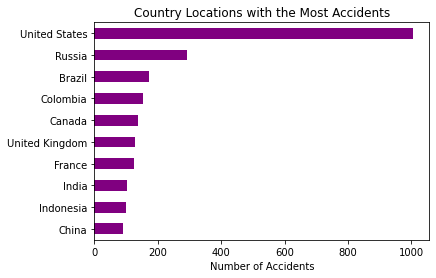

In [33]:
country_with_most_accidents = df.value_counts('country_loc').head(10).sort_values()
country_with_most_accidents.plot(kind='barh',
                                 title='Country Locations with the Most Accidents',
                                 color='purple')
plt.xlabel('Number of Accidents')
plt.ylabel(None)
plt.show()

### Country locations with the most fatalities

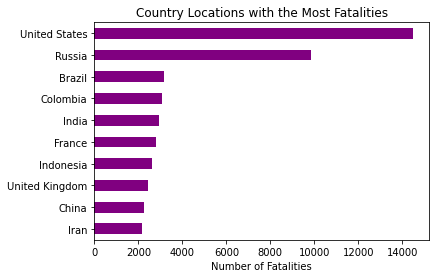

In [34]:
country_with_most_fatalities = df.groupby('country_loc').sum().sort_values(by='fatalities')['fatalities'].tail(10)
country_with_most_fatalities.plot(kind='barh',
                                  title='Country Locations with the Most Fatalities',
                                  color='purple')
plt.xlabel('Number of Fatalities')
plt.ylabel(None)
plt.show()

### Country locations with the most yearly fatalities

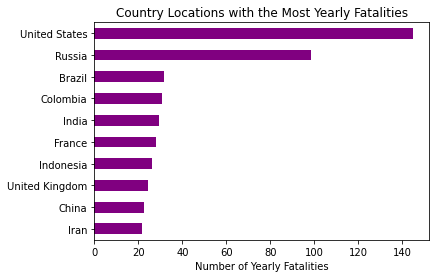

In [35]:
countries_yearly_fatalities = (df.groupby('country_loc').sum()['fatalities'].sort_values() / len(df.groupby(df['date'].dt.year))).tail(10)
countries_yearly_fatalities.plot(kind='barh',
                                 title='Country Locations with the Most Yearly Fatalities',
                                 color='purple')
plt.xlabel('Number of Yearly Fatalities')
plt.ylabel(None)
plt.show()

### Operators with the most accidents

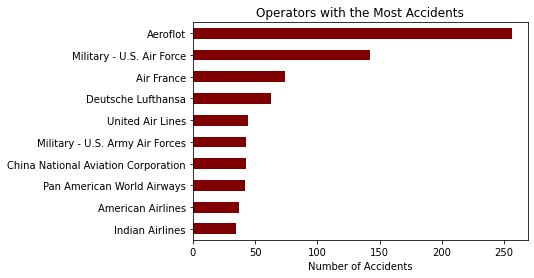

In [36]:
operator_with_most_accidents = df.value_counts('operator').head(10).sort_values()
operator_with_most_accidents.plot(kind='barh',
                                  title='Operators with the Most Accidents',
                                  color='maroon')
plt.xlabel('Number of Accidents')
plt.ylabel(None)
plt.show()

### Manufacturers with the most accidents

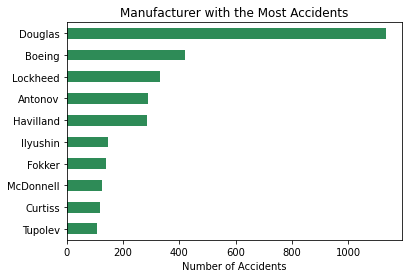

In [37]:
temp = df['ac_type'].str.split().explode()
manufacturer_with_most_accidents = temp.loc[~temp.isin(['de', 'Otter', 'Canada', 'DHC-6', 'Twin', 'DC-3', '/'])].value_counts().head(10).sort_values()
manufacturer_with_most_accidents.plot(kind='barh',
                                     title='Manufacturer with the Most Accidents',
                                     color='seagreen')
plt.xlabel("Number of Accidents")
plt.ylabel(None)
plt.show()

### Yearly Total Fatalities

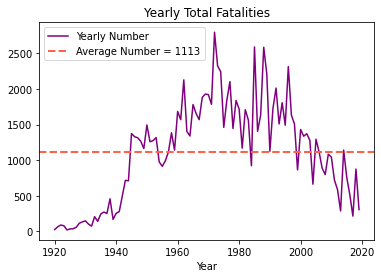

In [38]:
yearly_total_fatalities = df.groupby(df['date'].dt.year).sum()['fatalities']
yearly_total_fatalities.plot(title='Yearly Total Fatalities',
                             xlabel='Year',
                             color='purple',
                             label='Yearly Number')
plt.axhline(y=yearly_total_fatalities.mean(), color='tomato', ls='--', xmax=1, lw=2, label="Average Number = {:.0f}".format(yearly_total_fatalities.mean()))
plt.legend()
plt.show()

### Victims in Each Era

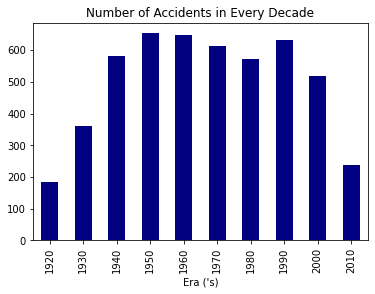

In [39]:
accidents_each_era = df.groupby((df['date'].dt.year//10)*10).count()['date']
accidents_each_era.plot.bar(title='Number of Accidents in Every Decade',
                            xlabel='Era (\'s)',
                            color=['navy'],
                            stacked=True)
plt.show()

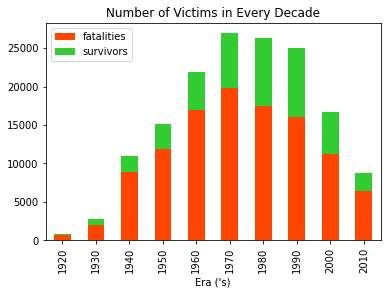

In [40]:
victims_each_era = pd.concat([df.date,df.fatalities,df.aboard-df.fatalities], axis=1).rename({0:'survivors'},axis=1).groupby((df['date'].dt.year//10)*10).sum()
victims_each_era.plot.bar(title='Number of Victims in Every Decade',
                         xlabel='Era (\'s)',
                         color=['orangered','limegreen'],
                         stacked=True)
plt.show()

### Accidents in Each Era

### Percentage of accidents with all dead and all survived victims condition

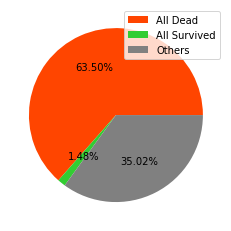

In [41]:
all_dead_accident = len(df.loc[df['aboard'] == df['fatalities']])
all_survived_accident = len(df.loc[df['fatalities'] == 0])

plt.pie([all_dead_accident, all_survived_accident, len(df) - all_dead_accident - all_survived_accident], autopct='%1.2f%%', colors=['orangered','limegreen','grey'])
plt.legend(['All Dead', 'All Survived', 'Others'])
plt.show()

It shows that only less than 2% of the accidents that have all of their victims survived

### Accidents happened to military planes

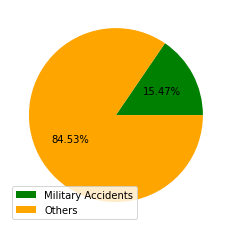

In [42]:
df_mil = df.loc[df['operator'].str.contains('military|army|force', case=False, na=False)]
mil_percentage = len(df_mil) / len(df) * 100
plt.pie([mil_percentage, 100 - mil_percentage], autopct='%1.2f%%', colors=['green','orange'])
plt.legend(['Military Accidents', 'Others'])
plt.show()

### Time insights

The day and night are divided at 6:00 equally

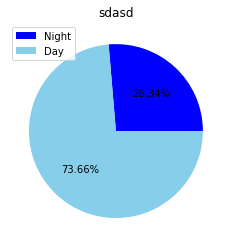

In [43]:
night_time_accidents = len(df.loc[(df['time'] > datetime.time(18, 0, 0)) | (df['time'] < datetime.time(6, 0, 0))])/len(df)*100

plt.pie([night_time_accidents, 100 - night_time_accidents], autopct='%1.2f%%', colors=['blue','skyblue'])
plt.legend(['Night', 'Day'])
plt.title('sdasd')
plt.show()

Nearly 3/4 of the accidents happen in daytime

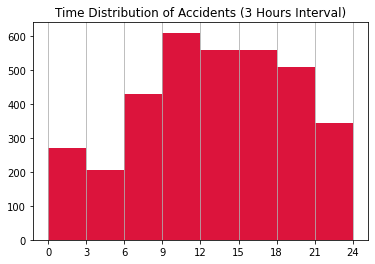

In [44]:
time_distribution = pd.to_datetime(df['time'].astype('str')).dt.hour.dropna().astype('int16')

xlabel = np.arange(0, 25, 3)
time_distribution.hist(bins=xlabel, color="crimson")
plt.title("Time Distribution of Accidents (3 Hours Interval)")
plt.grid(axis="y")
plt.xticks(xlabel)
plt.show()

***

# Future Analysis

Clustering on accident summary's text to to identify the most frequent causes of the accidents

Merging other dataset that contains the number of airplane passengers, number of airplane fleets, etc